Your Name: Kieran Fitzmaurice

On CourseWeb, you will find a file named `trumpet.txt`. It contains the waveform of a trumpet playing the note C$_5$ (with a frequency of 523.251 Hz).

- Read the file into an array and plot the waveform. Note that it was recorded at 44100 samples per second, which is typical for audio files.


- Play the file as audio. Supposing you called your array `trumpet`, you can do this using the following code snippet:
```
from IPython.display import Audio
Audio(trumpet, rate=44100)
```

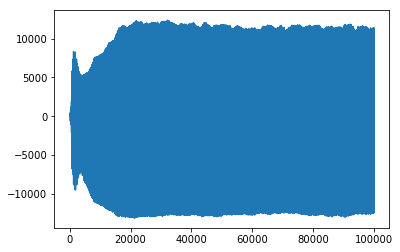

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fft
from IPython.display import Audio

trumpet = np.genfromtxt("trumpet.txt")
x = np.arange(0,trumpet.shape[0])
plt.plot(x,trumpet)
plt.show()
Audio(trumpet,rate = 44100)





- Calculate the Fourier transform of the trumpet's waveform, and plot the **power spectrum** of the Fourier coefficients ($|c_k|^2$) for frequencies between zero and 4000 Hz. Verify that there are peaks at multiples 523.251 Hz (these are the **harmonics**.)

>Hint 1: The maximum frequency of a Fourier transform is called the **Nyquist Frequency**, and is equal to *half* of the sampling rate: $44100/2 = 22050$ Hz.

>Hint 2: An audio waveform of length $N$ is a real function, so the Fourier transform only has half that many meaningful coefficients (rounded up).

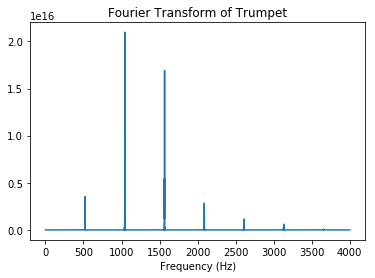

In [2]:
N = trumpet.shape[0]
dt = 1/44100
df = 1/(N*dt)

ft_trumpet = fft.fft(trumpet)
c_sq = abs(ft_trumpet)**2

freq = np.arange(0, 1/dt, df)
I = np.argwhere(freq < 4000)
plt.plot(freq[I],c_sq[I])
plt.xlabel("Frequency (Hz)")
plt.title("Fourier Transform of Trumpet")

plt.show()

Now let's look at (listen to) a more complicated waveform. Grab the file `Star Wars.wav` from CourseWeb, and verify that it plays.

In [3]:
Audio("Star Wars.wav")

What chord is played at the beginning of the *Star Wars* theme?

- Load the .wav file into an array. This can be done using
```
from scipy.io.wavfile import read as wavread
rate, data = wavread("Star Wars.wav")
```
where `rate` will be 44100 and `data` will be an array that holds the waveform.


- We only want to work with the first second or so of the clip, so let's crop the rest (using array slicing). Plot the portion of the waveform you plan to work with. If you want to be fancy, you can use `ipywidgets` to adjust the bounds of your plot interactively.

/Users/kieranfitzmaurice/anaconda/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


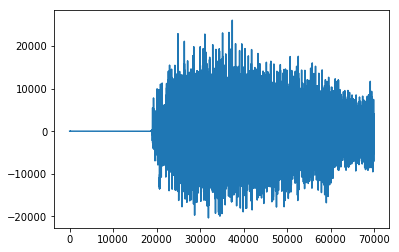

In [4]:
from scipy.io.wavfile import read as wavread
rate, data = wavread("Star Wars.wav")
clip = data[0:70000]

x = np.arange(0,clip.shape[0])
plt.plot(x,clip)
plt.show()

- Use `Audio` to verify that only the first note is played (the usage is the same as when you played the trumpet waveform).

In [5]:
Audio(clip,rate = 44100)

- Like you did for the trumpet, plot the power spectrum of the first chord in the *Star Wars* theme. Show frequencies ranging from zero to 2000 Hz.


- Look up the [frequencies for each note](https://en.wikipedia.org/wiki/Piano_key_frequencies), and identify as many notes as you can. Mark the notes you can identify on the power spectrum. This is a good place to use `pyplot.text` or `pyplot.annotate`.

> Hint 1: The largest peak should be a B$\flat_2$.

> Hint 2: Some notes appear at the same frequency as another note's harmonics. This make music "sound good," but it does make identifying the chord a little trickier. I suggest that you ignore the harmonics for this part, and just try to identify notes based on their fundamental frequency (i.e., the frequency listed on Wikipedia). You should be able to identify some more B$\flat$'s along with two other unique notes.

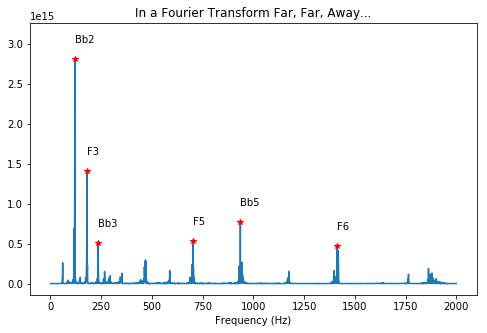

Frequency:	Note:


   119.70	Bb2

   179.55	F3

   234.99	Bb3

   701.19	F5

   935.55	Bb5

   1411.83	F6



In [6]:
N = clip.shape[0]
dt = 1/44100
df = 1/(N*dt)

ft_clip = fft.fft(clip)
c_sq = abs(ft_clip)**2
freq = np.arange(0, 1/dt, df)

I = np.argwhere(freq < 2000)
I_peaks = np.argwhere(c_sq[I] > 0.3e15) # get locations of peaks 
freq_tol = 20 # if within + or - 20 Hz, consider same peak
step = freq[-1]/freq.shape[0] #change in frequency per index
tol = int(freq_tol/step)

I_notes = []

for index in I_peaks: #keep value if is top of peak
    i = index[0]
    left = i - tol
    right = i + tol
    m = np.amax(c_sq[left:right])
    if  m == c_sq[i]:
        I_notes.append(i)
        
note_x = freq[I_notes]
note_y = 0.2e15 + c_sq[I_notes]
note_names = ["Bb2","F3","Bb3","F5","Bb5","F6"]


fig = plt.figure(figsize = (8,5))  
ax = fig.add_subplot(111)
plt.plot(freq[I],c_sq[I])   
plt.plot(freq[I_notes],c_sq[I_notes],'r*')

for i in range(0,len(I_notes)):
    ax.text(note_x[i],note_y[i],note_names[i])

plt.xlabel("Frequency (Hz)")
plt.title("In a Fourier Transform Far, Far, Away...")     
plt.axis(ymax = np.amax(note_y) + 0.25e15)
plt.show()

print("Frequency:\tNote:\n\n")
for i in range(0,len(I_notes)):
    print("   %.2lf\t%s\n" % (note_x[i],note_names[i]))
